In [71]:
import pandas as pd
import numpy as np


In [72]:
df_patient = pd.read_csv('data_creation/100_ECG.csv')
df_patient = df_patient.iloc[:, 0]
df_patient

0        -0.145
1        -0.145
2        -0.145
3        -0.145
4        -0.145
          ...  
649995   -0.075
649996   -0.445
649997   -0.675
649998   -0.765
649999   -1.280
Name: MLII, Length: 650000, dtype: float64

In [73]:
# Convert the Series to a NumPy array
data_array = df_patient.values

hz = 360
s = 2
t = hz*s

# Reshape the array
rows = len(data_array) // t
reshaped_data = data_array[:rows * t].reshape(rows, t)

# Create the DataFrame from the reshaped data
df_patient = pd.DataFrame(reshaped_data)

df_patient.head()


,0,1,2,3,4,5,6,7,8,9,...,710,711,712,713,714,715,716,717,718,719
0,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.120,-0.135,...,-0.400,-0.400,-0.395,-0.415,-0.405,-0.390,-0.400,-0.400,-0.415,-0.425
1,-0.425,-0.415,-0.415,-0.410,-0.425,-0.425,-0.420,-0.415,-0.400,-0.400,...,-0.325,-0.345,-0.350,-0.340,-0.330,-0.320,-0.310,-0.305,-0.305,-0.275
2,-0.270,-0.255,-0.260,-0.265,-0.260,-0.250,-0.235,-0.235,-0.220,-0.235,...,-0.385,-0.395,-0.405,-0.390,-0.370,-0.370,-0.370,-0.385,-0.370,-0.355
3,-0.345,-0.340,-0.335,-0.340,-0.355,-0.335,-0.325,-0.310,-0.305,-0.305,...,-0.325,-0.325,-0.345,-0.330,-0.320,-0.320,-0.335,-0.335,-0.355,-0.340
4,-0.320,-0.315,-0.330,-0.340,-0.340,-0.350,-0.330,-0.330,-0.340,-0.350,...,-0.375,-0.385,-0.390,-0.390,-0.385,-0.385,-0.395,-0.390,-0.400,-0.405


In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_patient = scaler.fit_transform(df_patient)
df_patient = pd.DataFrame(df_patient)

In [75]:
import pywt

def madev(d, axis=None):
    'Mean absolute deviation of a signal'
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='sym4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = [pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:]]
    return pywt.waverec(coeff, wavelet, mode='per')


df_patient = wavelet_denoising(df_patient, wavelet='sym4', level=2)
df_patient = pd.DataFrame(df_patient)


In [76]:
df_patient

,0,1,2,3,4,5,6,7,8,9,...,710,711,712,713,714,715,716,717,718,719
0,0.241913,0.246405,0.249730,0.251372,0.252740,0.253774,0.253252,0.252525,0.254960,0.258484,...,0.114418,0.110035,0.117554,0.130552,0.144206,0.159726,0.177176,0.194722,0.214391,0.233060
1,0.162685,0.161332,0.159860,0.158226,0.156486,0.154680,0.152723,0.150735,0.149037,0.147439,...,0.165546,0.165223,0.165050,0.164931,0.164701,0.164441,0.164317,0.164136,0.163985,0.163688
2,0.171046,0.174812,0.179055,0.183592,0.187545,0.191445,0.195352,0.199326,0.204089,0.209165,...,0.155702,0.157967,0.159409,0.160541,0.161869,0.163197,0.164314,0.165571,0.166643,0.168009
3,0.181786,0.181649,0.181449,0.181163,0.180834,0.180470,0.180024,0.179552,0.179204,0.178889,...,0.178131,0.178490,0.178839,0.179207,0.179535,0.179866,0.180332,0.180799,0.181300,0.181737
4,0.147286,0.147943,0.148932,0.150248,0.151471,0.152770,0.154289,0.155907,0.157499,0.159127,...,0.161249,0.160124,0.158794,0.157311,0.155985,0.154640,0.152822,0.151031,0.149072,0.147375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,0.200121,0.184552,0.167029,0.147707,0.132619,0.119799,0.104458,0.091227,0.086127,0.083363,...,0.173493,0.162924,0.162127,0.165769,0.168116,0.171638,0.179651,0.187643,0.199004,0.208507
898,0.188692,0.189451,0.190269,0.191237,0.192400,0.193627,0.195040,0.196453,0.197286,0.197898,...,0.190590,0.190484,0.190343,0.190147,0.190031,0.189905,0.189512,0.189114,0.188647,0.188295
899,0.171464,0.172556,0.173573,0.174518,0.175446,0.176328,0.177155,0.177927,0.178616,0.179245,...,0.157076,0.158210,0.159671,0.161245,0.162806,0.164374,0.165895,0.167366,0.168841,0.170256
900,0.159625,0.159345,0.159053,0.158718,0.158375,0.158042,0.157662,0.157303,0.157154,0.157096,...,0.159973,0.159773,0.159511,0.159296,0.159094,0.158950,0.159052,0.159225,0.159493,0.159749


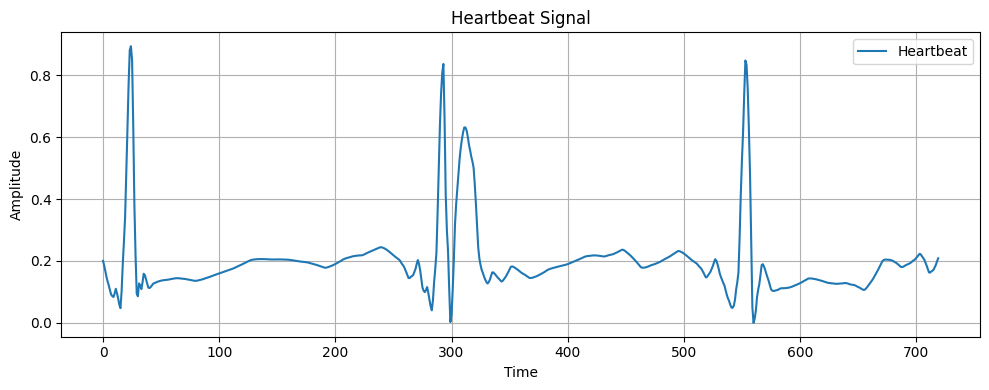

In [77]:
import matplotlib.pyplot as plt
import numpy as np

heartbeat_values = df_patient.iloc[897,]
heartbeat_values
# Creating a time axis for the 3600 points, assuming each point represents a unit of time
time_axis = np.arange(0, 720)

# Plotting the heartbeat
plt.figure(figsize=(10, 4))
plt.plot(time_axis, heartbeat_values, label='Heartbeat')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Heartbeat Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

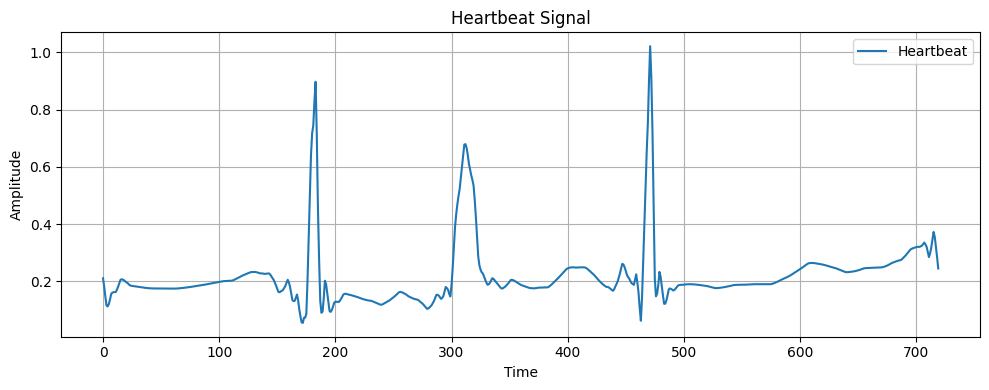

In [78]:
import matplotlib.pyplot as plt
import numpy as np

heartbeat_values = df_patient.iloc[500,]
heartbeat_values
# Creating a time axis for the 3600 points, assuming each point represents a unit of time
time_axis = np.arange(0, 720)

# Plotting the heartbeat
plt.figure(figsize=(10, 4))
plt.plot(time_axis, heartbeat_values, label='Heartbeat')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Heartbeat Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
from tensorflow.keras.models import load_model
loaded_model = load_model('Conv1D_Model.h5')

In [80]:
# import pickle

# with open('svm_classifier.pkl', 'rb') as file:
#     svm_classifier = pickle.load(file)

# print("Model loaded successfully.")

In [81]:
# Use the model to make predictions
prediction = loaded_model.predict(df_patient)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [82]:
# Convert predictions to 0 or 1 based on the 0.5 threshold
predicted_classes = (prediction > 0.5).astype(int)

# Count the number of 1s and 0s
# np.sum() on a boolean array gives the count of True values (which are considered as 1)
count_1s = np.sum(predicted_classes == 1)
count_0s = np.sum(predicted_classes == 0)

print(f"Count of 1s: {count_1s}")
print(f"Count of 0s: {count_0s}")

Count of 1s: 53
Count of 0s: 849
